<a href="https://colab.research.google.com/github/narendrasfo/tenserflow-ml/blob/main/Predict_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2004 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0809 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 5/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9915
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0261 - accuracy: 0.9915


test for whole array 

In [3]:
res=model.predict(x_test)

In [16]:
import numpy as np
ss=np.array([x_test[0]])
res=model.predict(ss)
#x=np.sort(res[0])
print(res[0])

[1.9234788e-08 8.1102938e-09 1.8728257e-07 3.9410355e-04 2.2388615e-09
 9.0326463e-10 7.1053628e-13 9.9938118e-01 5.7527298e-08 2.2442969e-04]


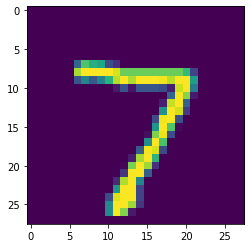

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])